In [126]:
import numpy as np
import pandas as pd 
import datetime
import warnings
import nltk
import random
import re
import sklearn
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

nltk.download('punkt',download_dir="/kaggle/working/")
nltk.download('wordnet',download_dir="/kaggle/working/")
nltk.download('stopwords',download_dir="/kaggle/working/")
nltk.data.path.append('/kaggle/working/') 
with zipfile.ZipFile("/kaggle/working/corpora/wordnet.zip", 'r') as zip_f:
    zip_f.extractall("/kaggle/working/corpora/")
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
%matplotlib inline
sns.set_style("dark")

[nltk_data] Downloading package punkt to /kaggle/working/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /kaggle/working/...
[nltk_data]   Package stopwords is already up-to-date!


# Importing Dataset

In [127]:
stock_data = pd.read_csv("/kaggle/input/stocknews/Combined_News_DJIA.csv",encoding = "latin-1",parse_dates=True)
stock_data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


# Text Preprocessing 
#### - Stopwords
#### - Lemmatization
#### - Removing Special Chars

In [128]:
stopwords = nltk.corpus.stopwords.words("english")

In [129]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def textPreprocess(text):
    text = re.sub("[^a-zA-Z0-9\s]","",str(text)[1:]).lower()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]
    text = " ".join(words)
    return text

for i in range(1,26):
    col="Top"+str(i)
    stock_data[col] = stock_data[col].apply(textPreprocess)

In [130]:
news = []
for i in range(stock_data.shape[0]):
    news.append(" ".join(str(x) for x in stock_data.iloc[i,2:]))
    
stock_data["News"] = news

In [131]:
stock_data["News"][6]

'afghan prison majority female prisoner serving 20year sentence victim rape little girl youre ugly pakistan musharraf resign leave country tornado throw bus poland captured one passenger britain terror law left family shattered iran fire satellite space right nonmuslims restricted new maldives constitution tour tskhinvali undercut russian version fighting great resource war already underway mainly middle east also smaller skirmish scattered area around world disguised many global war terror 190000 u contractor working iraq russia move ss21 missile georgia u defense official president say resigning avoid impeachment battle would harm nation interest democratic georgia shuts opposition tv channel owned russian new cold war option russian parliamentarian georgian situation continues quest prize oil money power mi5 seek gay spy new porn channel let canadian strut stuff dangerous neighbor vladimir putin take powerless west israel opinion page russian saner nato hour georgian president saaka

In [132]:
cols=["Top"+str(i) for i in range(1,26)]

stock_data.drop(cols,axis=1,inplace=True)
stock_data.head(3)

,Date,Label,News
0,2008-08-08,0,georgia down two russian warplane country move...
1,2008-08-11,1,wont america nato help u wont help u help iraq...
2,2008-08-12,0,remember adorable 9yearold sang opening ceremo...


# Applying TF-IDF

In [133]:
tfidfVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range=(2,2),max_features=5000)
df = pd.DataFrame(tfidfVectorizer.fit_transform(stock_data["News"]).toarray())
stock_data = pd.concat((stock_data,df),axis=1)
stock_data.shape

(1989, 5003)

In [134]:
stock_data.head()

,Date,Label,News,0,1,2,3,4,5,6,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,2008-08-08,0,georgia down two russian warplane country move...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-08-11,1,wont america nato help u wont help u help iraq...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-08-12,0,remember adorable 9yearold sang opening ceremo...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-08-13,0,u refuse israel weapon attack iran report pres...,0.0,0.0,0.182908,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-08-14,1,expert admit legalise drug war south osetia 89...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Models

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

trainCol = [i for i in stock_data.columns if (i!="Label"and i!="Date" and i!="News")]
seed = np.random.seed(6)

train_data = stock_data[stock_data["Date"]<"20140101"]
test_data = stock_data[stock_data["Date"]>="20140101"]
print(train_data.shape,test_data.shape)

X_train = train_data[trainCol]
y_train = train_data["Label"]
X_test = test_data[trainCol]
y_test = test_data["Label"]

(1611, 5003) (378, 5003)


In [136]:
rf_model = RandomForestClassifier(n_estimators=1000,criterion='entropy')
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [137]:
xgb_model = XGBClassifier(n_estimators=1000,seed=seed,tree_method='gpu_hist')
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [138]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)

MultinomialNB()

# Evaluating the Models

----------------------------------------------------------------------------------------------------
Accuracy: 0.49206349206349204
Precision: 0.5
ROC AUC: 0.4960657482078853
----------------------------------------------------------------------------------------------------


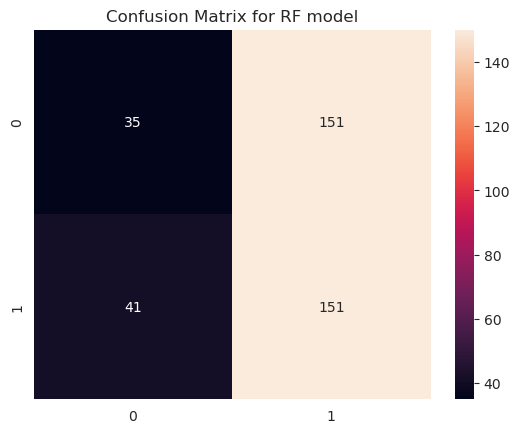

In [143]:
print("-"*100)
print("Accuracy:",accuracy_score(y_test,rf_model.predict(X_test)))
print("Precision:",precision_score(y_test,rf_model.predict(X_test)))
print("ROC AUC:",roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
print("-"*100)
cnf_matrix = confusion_matrix(y_test,rf_model.predict(X_test))
sns.heatmap(cnf_matrix,annot=True,vmax=150,cmap="rocket",fmt=".5g")
plt.title("Confusion Matrix for RF model");

----------------------------------------------------------------------------------------------------
Accuracy: 0.5052910052910053
Precision: 0.5102880658436214
ROC AUC: 0.5046482974910395
----------------------------------------------------------------------------------------------------


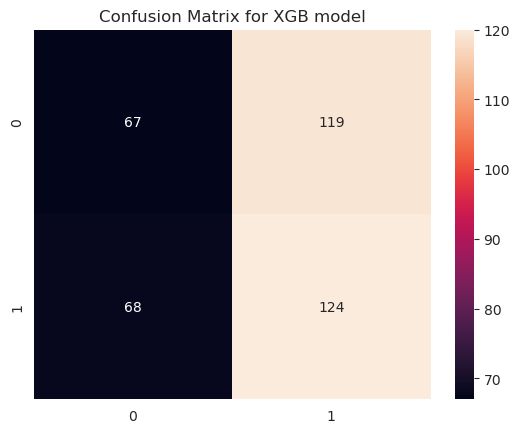

In [140]:
print("-"*100)
print("Accuracy:",accuracy_score(y_test,xgb_model.predict(X_test)))
print("Precision:",precision_score(y_test,xgb_model.predict(X_test)))
print("ROC AUC:",roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print("-"*100)
cnf_matrix = confusion_matrix(y_test,xgb_model.predict(X_test))
sns.heatmap(cnf_matrix,annot=True,vmax=120,cmap="rocket",fmt=".5g")
plt.title("Confusion Matrix for XGB model");

----------------------------------------------------------------------------------------------------
Accuracy: 0.48148148148148145
Precision: 0.4928571428571429
ROC AUC: 0.507728494623656
----------------------------------------------------------------------------------------------------


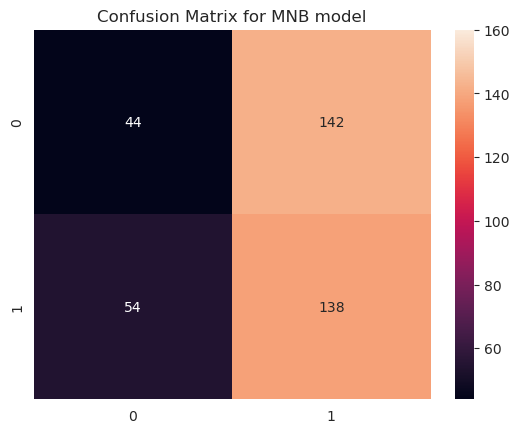

In [142]:
print("-"*100)
print("Accuracy:",accuracy_score(y_test,mnb_model.predict(X_test)))
print("Precision:",precision_score(y_test,mnb_model.predict(X_test)))
print("ROC AUC:",roc_auc_score(y_test, mnb_model.predict_proba(X_test)[:,1]))
print("-"*100)
cnf_matrix = confusion_matrix(y_test,mnb_model.predict(X_test))
sns.heatmap(cnf_matrix,annot=True,vmax=160,cmap="rocket",fmt=".5g")
plt.title("Confusion Matrix for MNB model");